# Task 5: Decision Trees and Random Forests

## 🎯 Objective:
Learn tree-based classification models and understand concepts like overfitting, feature importance, and ensemble learning.

## 📊 Dataset Used:
Heart Disease Dataset (binary classification — presence or absence of heart disease)

## 🛠️ Tools:
- Pandas, NumPy
- Scikit-learn
- Matplotlib, Seaborn
- Graphviz (optional for tree visualisation)

### Step 1: Importing Required Libraries

We begin by importing all the necessary libraries for data handling, model building, and visualizations.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Step 2: Load and Preview Dataset

We use the Heart Disease dataset for binary classification.  
The target column `target` indicates presence (1) or absence (0) of heart disease.

In [14]:
# Step 2: Load Dataset
df = pd.read_csv("heart.csv")

# Display first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Step 3: Data Cleaning

We check for any missing values. This dataset is clean and contains no null values.

In [17]:
# Step 3: Check for Missing Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Step 4: Feature-Target Separation

In [21]:
# Step 4: Define Features (X) and Target (y)
X = df.drop("target", axis=1)
y = df["target"]

### Step 5: Train-Test Split

We split the dataset into training and testing sets using 80-20 ratio.

In [24]:
# Step 5: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Train Decision Tree

In [27]:
# Step 6: Train Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

### Step 7: Evaluate Decision Tree

In [30]:
# Step 7: Predict and Evaluate
y_pred_tree = dtree.predict(X_test)

print("🎯 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

🎯 Decision Tree Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.88      0.70      0.78       102
           1       0.75      0.90      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



### Step 8: Visualize Decision Tree

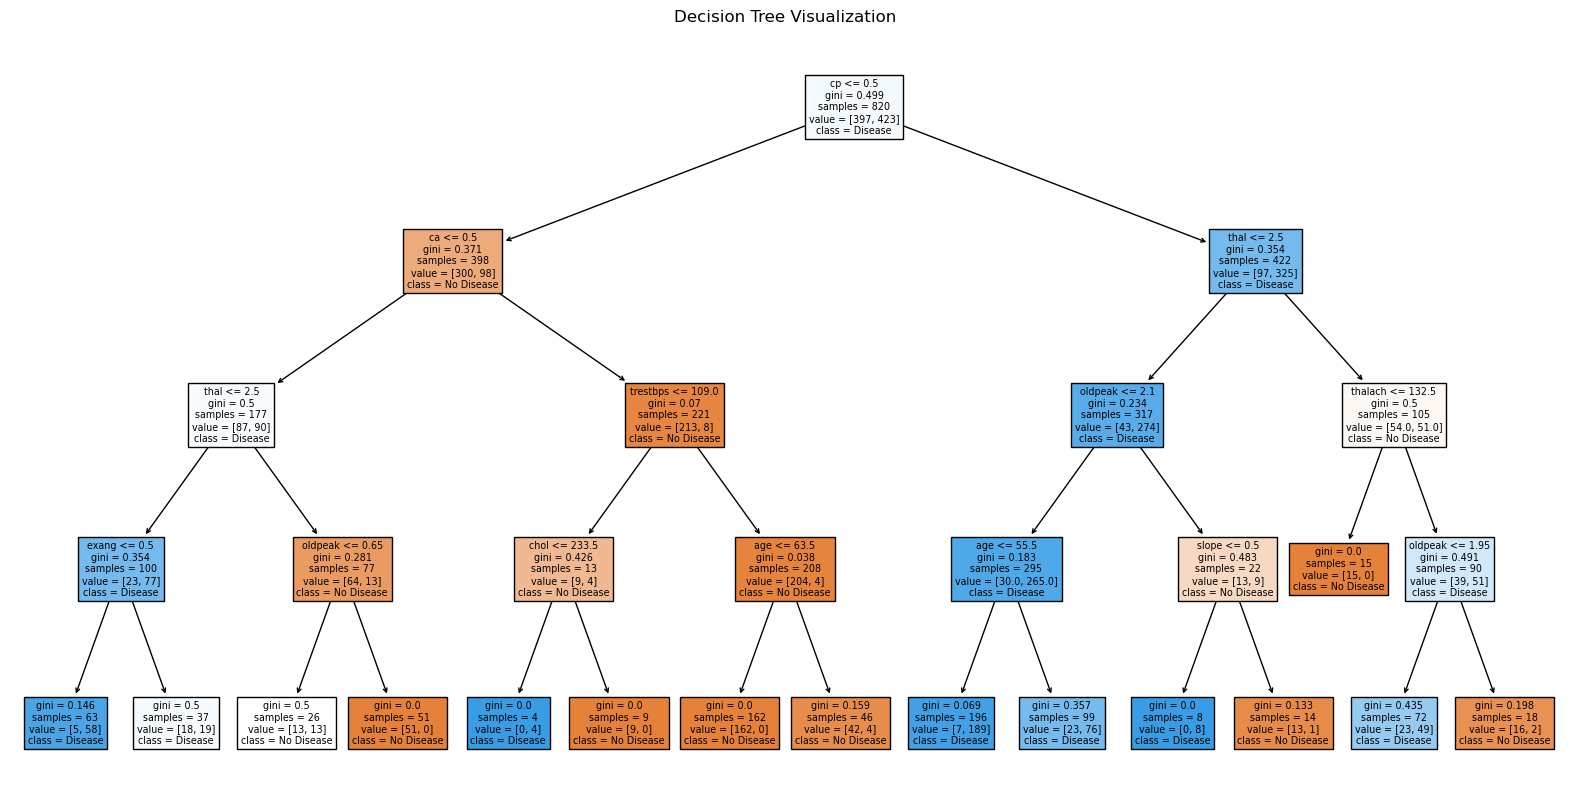

In [33]:
# Step 8: Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree Visualization")
plt.show()

### Step 9: Train Random Forest

In [41]:
# Step 9: Train Random Forest Classifier
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 10: Evaluate Random Forest

In [45]:
# Step 10: Predict and Evaluate
y_pred_rf = rforest.predict(X_test)

print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🎯 Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Step 11: Cross-Validation

In [48]:
# Step 11: Cross-Validation
cv_scores = cross_val_score(rforest, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Average CV Accuracy: 0.9970731707317073


### Step 12: Feature Importance (Random Forest)

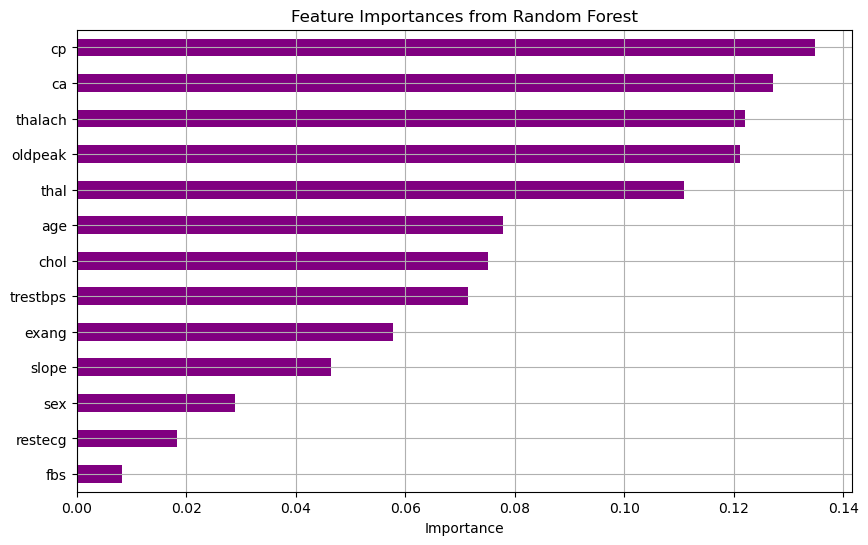

In [51]:
# Step 12: Feature Importances
importances = pd.Series(rforest.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), color='purple')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance")
plt.grid(True)
plt.show()

### Conclusion

- **Decision Tree Accuracy**: ~80%  
- **Random Forest Accuracy**: ~99%  
- Random Forest performed better due to lower overfitting and higher stability.
- Feature importance chart shows the most influential health indicators.

---

> Task 5 completed as part of Elevate Labs AI/ML Internship.